# 数据挖掘实践任务

<b>任务描述</b>

- 使用网格搜索法对5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost）进行调优（调参时采用五折交叉验证的方式），并进行模型评估

In [2]:
# 获取Task2进行特征选择后的数据集
import pandas as pd
dataset = pd.read_csv('./dataset/task2_proc.csv')
features = dataset.iloc[:,:-1]
labels = dataset.iloc[:,-1]
print('feature shape:{}, label shape:{}'.format(features.shape,labels.shape))

feature shape:(4455, 49), label shape:(4455,)


In [3]:
# 数据拆分
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

random_state = 2018
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.3,random_state=random_state)

# 对训练数据集进行标准化处理
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

In [4]:
# 导入库
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,cross_val_predict
from scipy.stats import uniform
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,confusion_matrix
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [5]:
model_score_train = []   
decision_score_train = [] 
model_score_test = []   
decision_score_test = []

def proc_score(y_pred,y_pred_scores,y_test,train=True):  
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred_scores)

    if train:
        decision_score_train.append(y_pred_scores)
        model_score_train.append([accuracy,precision,recall,f1,roc_auc])
        text = 'Train'
    else:
        decision_score_test.append(y_pred_scores)
        model_score_test.append([accuracy,precision,recall,f1,roc_auc])
        text = 'Test'
    print('{} confusion matrix:\n{}'.format(text,confusion_matrix(y_test,y_pred)))
    print('{}: accuracy:{:.3f},precision:{:.3f},recall:{:.3f},f1:{:.3f},roc_auc:{:.3f}'.format(text,accuracy,precision,recall,f1,roc_auc))

# 逻辑回归

In [6]:
param_distributions = {'C':uniform(0,10)}
rs_clf = RandomizedSearchCV(LogisticRegression(solver='liblinear'), param_distributions=param_distributions, cv = 5,n_iter=500,
                           random_state=random_state,verbose=2,n_jobs=-1)
rs_clf.fit(x_train_scale,y_train)
logistic = rs_clf.best_estimator_
#保存模型
with open('./model_saved/logistic.pickle','wb') as pf:
    pickle.dump(logistic,pf)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  3.6min finished


In [7]:
with open('./model_saved/logistic.pickle','rb') as pf:
    logistic = pickle.load(pf)
    y_pred = logistic.predict(x_train_scale)
    y_pred_scores = cross_val_predict(logistic,x_train_scale,y_train,cv=5,
                                    method='decision_function')
    proc_score(y_pred,y_pred_scores,y_train,train=True)
    y_pred = logistic.predict(x_test_scale)
    y_pred_scores = cross_val_predict(logistic,x_test_scale,y_test,cv=5,
                                    method='decision_function')
    proc_score(y_pred,y_pred_scores,y_test,train=False)

Train confusion matrix:
[[2186  135]
 [ 500  297]]
Train: accuracy:0.796,precision:0.688,recall:0.373,f1:0.483,roc_auc:0.789
Test confusion matrix:
[[932  81]
 [202 122]]
Test: accuracy:0.788,precision:0.601,recall:0.377,f1:0.463,roc_auc:0.783


# SVM

In [8]:
param_distributions = {'C':uniform(0,10)}
rs_clf = RandomizedSearchCV(SVC(), param_distributions=param_distributions,cv=5,n_iter=50,
                              random_state=random_state,verbose=2,n_jobs=-1)
rs_clf.fit(x_train_scale, y_train)
with open('./model_saved/svc.pickle','wb') as pf:
    pickle.dump(rs_clf.best_estimator_,pf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.1min finished


In [9]:
with open('./model_saved/svc.pickle','rb') as pf:
    svc = pickle.load(pf) 
    y_pred = svc.predict(x_train_scale)
    y_pred_scores = cross_val_predict(svc,x_train_scale,y_train,cv=3,
                                    method='decision_function')
    proc_score(y_pred,y_pred_scores,y_train,train=True)

    y_pred = svc.predict(x_test_scale)
    y_pred_scores = cross_val_predict(svc,x_test_scale,y_test,cv=5,
                                    method='decision_function')
    proc_score(y_pred,y_pred_scores,y_test,train=False)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train confusion matrix:
[[2276   45]
 [ 485  312]]
Train: accuracy:0.830,precision:0.874,recall:0.391,f1:0.541,roc_auc:0.768


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

Test confusion matrix:
[[975  38]
 [239  85]]
Test: accuracy:0.793,precision:0.691,recall:0.262,f1:0.380,roc_auc:0.764


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 决策树

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':np.linspace(2,32,31,dtype=np.int32),
             'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),
             'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True)}

gs_clf = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,iid=True,cv=5,verbose=2,n_jobs=-1)
gs_clf.fit(x_train_scale,y_train)
with open('./model_saved/DecisionTree.pickle','wb') as pf:
    pickle.dump(gs_clf.best_estimator_,pf)

Fitting 5 folds for each of 1550 candidates, totalling 7750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 253 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 829 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 3421 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 5201 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 7309 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7750 out of 7750 | elapsed:  1.3min finished


In [11]:
with open('./model_saved/DecisionTree.pickle','rb') as pf:
    dt_clf = pickle.load(pf)
    print(dt_clf)
    y_pred = dt_clf.predict(x_train_scale)
    y_pred_scores = cross_val_predict(dt_clf,x_train_scale,y_train,cv=5,
                                    method='predict_proba')
    proc_score(y_pred,y_pred_scores[:,1],y_train,train=True)

    y_pred = dt_clf.predict(x_test_scale)
    y_pred_scores = cross_val_predict(dt_clf,x_test_scale,y_test,cv=5,
                                    method='predict_proba')
    proc_score(y_pred,y_pred_scores[:,1],y_test,train=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Train confusion matrix:
[[2154  167]
 [ 535  262]]
Train: accuracy:0.775,precision:0.611,recall:0.329,f1:0.427,roc_auc:0.738
Test confusion matrix:
[[946  67]
 [225  99]]
Test: accuracy:0.782,precision:0.596,recall:0.306,f1:0.404,roc_auc:0.718


# 随机森林

In [12]:
param_grid = {'max_depth':np.linspace(5,100,20,dtype=np.int32)}
gd_clf = GridSearchCV(RandomForestClassifier(n_estimators=100,criterion='gini'),
                      param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
gd_clf.fit(x_train_scale,y_train)
print(gd_clf.best_estimator_)
with open('./model_saved/RandomForest.pickle','wb') as pf:
    pickle.dump(gd_clf.best_estimator_,pf)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.3s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [13]:
with open('./model_saved/RandomForest.pickle','rb') as pf:
    rf_clf = pickle.load(pf)
    y_pred = rf_clf.predict(x_train_scale)
    y_pred_scores = cross_val_predict(rf_clf,x_train_scale,y_train,cv=5,
                                    method='predict_proba')
    proc_score(y_pred,y_pred_scores[:,1],y_train,train=True)

    y_pred = rf_clf.predict(x_test_scale)
    y_pred_scores = cross_val_predict(rf_clf,x_test_scale,y_test,cv=5,
                                    method='predict_proba')
    proc_score(y_pred,y_pred_scores[:,1],y_test,train=False)

Train confusion matrix:
[[2321    0]
 [   0  797]]
Train: accuracy:1.000,precision:1.000,recall:1.000,f1:1.000,roc_auc:0.781
Test confusion matrix:
[[966  47]
 [236  88]]
Test: accuracy:0.788,precision:0.652,recall:0.272,f1:0.383,roc_auc:0.770


# xgboost

In [14]:
from xgboost import XGBClassifier
xgbst = XGBClassifier()
xgbst.fit(x_train_scale,y_train)
with open('./model_saved/xgboost.pickle','wb') as pf:
    pickle.dump(xgbst,pf)

In [15]:
with open('./model_saved/xgboost.pickle','rb') as pf:
    xgbst = pickle.load(pf)
    y_pred = xgbst.predict(x_train_scale)
    y_pred_scores = cross_val_predict(xgbst,x_train_scale,y_train,cv=5,
                                    method='predict_proba')
    proc_score(y_pred,y_pred_scores[:,1],y_train,train=True)

    y_pred = xgbst.predict(x_test_scale)
    y_pred_scores = cross_val_predict(xgbst,x_test_scale,y_test,cv=5,
                                    method='predict_proba')
    proc_score(y_pred,y_pred_scores[:,1],y_test,train=False)

Train confusion matrix:
[[2236   85]
 [ 394  403]]
Train: accuracy:0.846,precision:0.826,recall:0.506,f1:0.627,roc_auc:0.787
Test confusion matrix:
[[965  48]
 [226  98]]
Test: accuracy:0.795,precision:0.671,recall:0.302,f1:0.417,roc_auc:0.781


# 对各模型分数进行比较

In [16]:
# 绘制ROC取下对比图
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')

In [17]:
model_name = ['Logistic','SVM','DecisionTree','RandomForest','xgboost']
columns = ['accuracy','precision','recall','f1','roc_auc']
ttype = ['train','test']
pd_list = []
for train,test in zip(model_score_train,model_score_test):
    pd_list.append(pd.DataFrame([train,test],index=ttype,columns=columns))
    
pd.concat(pd_list,axis=0,keys=model_name)

accuracy  precision    recall        f1   roc_auc
Logistic     train  0.796344   0.687500  0.372647  0.483320  0.789421
             test   0.788332   0.600985  0.376543  0.462998  0.782701
SVM          train  0.830019   0.873950  0.391468  0.540728  0.768480
             test   0.792820   0.691057  0.262346  0.380313  0.764436
DecisionTree train  0.774856   0.610723  0.328733  0.427406  0.737730
             test   0.781601   0.596386  0.305556  0.404082  0.718263
RandomForest train  1.000000   1.000000  1.000000  1.000000  0.780634
             test   0.788332   0.651852  0.271605  0.383442  0.769515
xgboost      train  0.846376   0.825820  0.505646  0.627237  0.787055
             test   0.795064   0.671233  0.302469  0.417021  0.781169

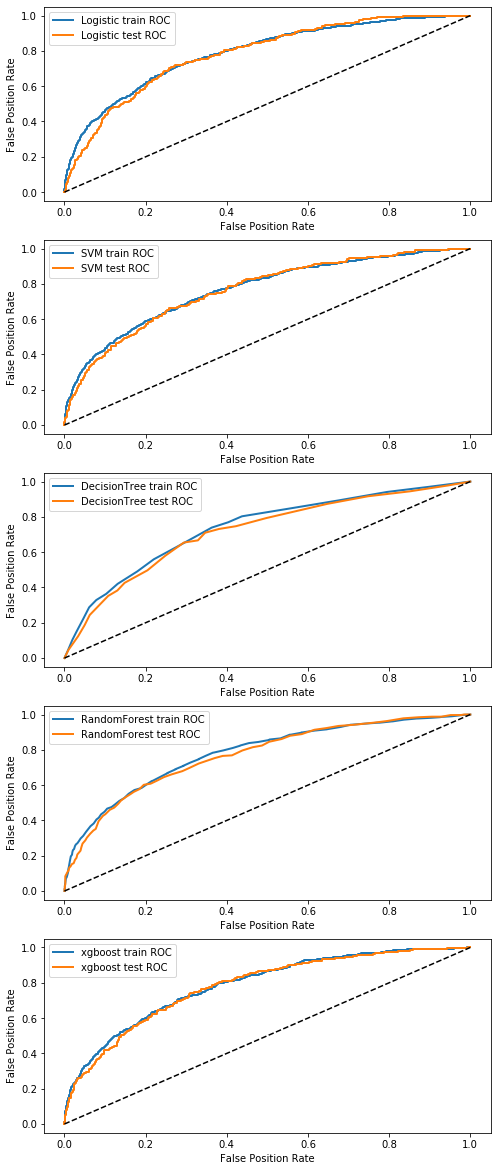

In [18]:
fig = plt.figure(figsize=(8,25))
for i,label in enumerate(model_name):
    train_fpr,train_tpr,train_threshold = roc_curve(y_train,decision_score_train[i])
    test_fpr,test_tpr,test_threshold = roc_curve(y_test,decision_score_test[i])
    ax = fig.add_subplot(int('61'+str(i+1)))
    ax.plot(train_fpr,train_tpr,linewidth=2,label=label+' train ROC')
    ax.plot(test_fpr,test_tpr,linewidth=2,label=label+' test ROC')
    ax.plot([0,1],[0,1],'k--')
    ax.legend()
    plt.xlabel('False Position Rate')
    plt.ylabel('False Position Rate')
    
plt.show()

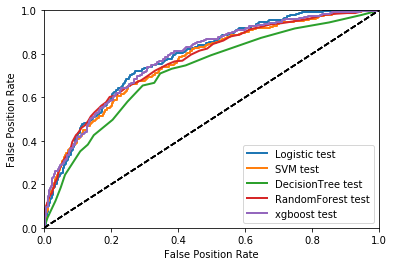

In [19]:
for score,label in zip(decision_score_test,['Logistic','SVM','DecisionTree','RandomForest','xgboost']):
    fpr,tpr,threshold = roc_curve(y_test,score)
    plot_roc_curve(fpr,tpr,label=label+' test')
plt.rcParams['figure.figsize'] = (8,5)    
plt.axis([0,1,0,1])
plt.xlabel('False Position Rate')
plt.ylabel('False Position Rate')
plt.legend()
plt.show()